In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

root = Path("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/")

In [10]:
# all subdirectories of the form `run_name`*
run_name = "am_title_matching"
# title = "Amazon Polarity \"look at title only\""
title = "Sciq with support \"does context contain `ans`\""
data = []
configs = []
names = [
    "am_title_0_matching",
    "am_title_32x48_matching",
    "am_title_128x12_matching",
    "am_title_512_matching",
    "am_title_512x4_matching",
    "am_title_2000_matching",
    "am_title_2000x4_matching",
    "am_title_8000_matching",
]
    # "ss_contains_0",
    # "ss_contains_32x48",
    # "ss_contains_128x12",
    # "ss_contains_512",
    # "ss_contains_512x4",
    # "ss_contains_2000",
    # "ss_contains_2000x4",
    # "ss_contains_8000",
    # 'am_title_0',
    # 'am_title_32x48',
    # 'am_title_128x12',
    # 'am_title_512',
    # 'am_title_512x4',
    # 'am_title_2000',
    # 'am_title_2000x4',
    # 'am_title_8000',

for name in names:
    d = root / name
    df = pd.read_json(d / "results.json", orient="records", lines=True)
    with open(d / "config.json") as f:
        config = json.load(f)
    data.append(df)
    configs.append(config)


In [11]:
df

,ids,num_oracle,oracle_ids,num_weak,calibrated_logodds,gt_soft_labels,auroc,acc,auroc_against_weak,acc_against_weak,weak_soft_labels
0,"[31103764, 92dbe902, 94f2476d, b8888357, 64873...",0,[],8000,"[1.22265625, -0.4560546875, -1.0625, -1.183593...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",0.948743,0.8620,0.977952,0.9135,"[0.7732163668, 0.3081902266, 0.234406635200000..."
1,"[31103764, 92dbe902, 94f2476d, b8888357, 64873...",4,"[d261facc, 9089959b, 165fb7c0, 59d70839]",8000,"[-0.0754394531, -0.1682128906, -0.265625, -0.1...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",0.904213,0.5020,0.934719,0.5385,"[0.7732163668, 0.3081902266, 0.234406635200000..."
2,"[31103764, 92dbe902, 94f2476d, b8888357, 64873...",16,"[e6960303, 395e8287, 59d70839, 13878dfb, 40e0a...",8000,"[-0.0419311523, -0.1593017578, -0.2802734375, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",0.922497,0.5075,0.952143,0.5430,"[0.7732163668, 0.3081902266, 0.234406635200000..."
3,"[31103764, 92dbe902, 94f2476d, b8888357, 64873...",64,"[dc79378f, 77d90b41, 40e0a328, e71836cd, 0b287...",8000,"[0.0172119141, -0.1605224609, -0.3349609375, -...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",0.938196,0.6745,0.967497,0.7180,"[0.7732163668, 0.3081902266, 0.234406635200000..."
4,"[31103764, 92dbe902, 94f2476d, b8888357, 64873...",256,"[fc4fdc50, 763e6622, dc79378f, 8980b762, 77d90...",8000,"[0.40625000000000006, -0.2705078125, -0.746093...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",0.948652,0.8570,0.977649,0.9165,"[0.7732163668, 0.3081902266, 0.234406635200000..."
5,"[31103764, 92dbe902, 94f2476d, b8888357, 64873...",1024,"[fc4fdc50, c8bc0f1b, 4aed469c, 77d90b41, 5fb82...",8000,"[3.046875, 0.921875, -2.0625, -2.6015625, 3.0,...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",0.969171,0.8965,0.974088,0.9030,"[0.7732163668, 0.3081902266, 0.234406635200000..."
6,"[31103764, 92dbe902, 94f2476d, b8888357, 64873...",4096,"[fc4fdc50, c57f6ab4, e82c5aec, 955ff13c, 16009...",8000,"[4.640625, 4.109375, -4.765625, -4.734375, 4.5...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",0.995134,0.9735,0.917983,0.8470,"[0.7732163668, 0.3081902266, 0.234406635200000..."


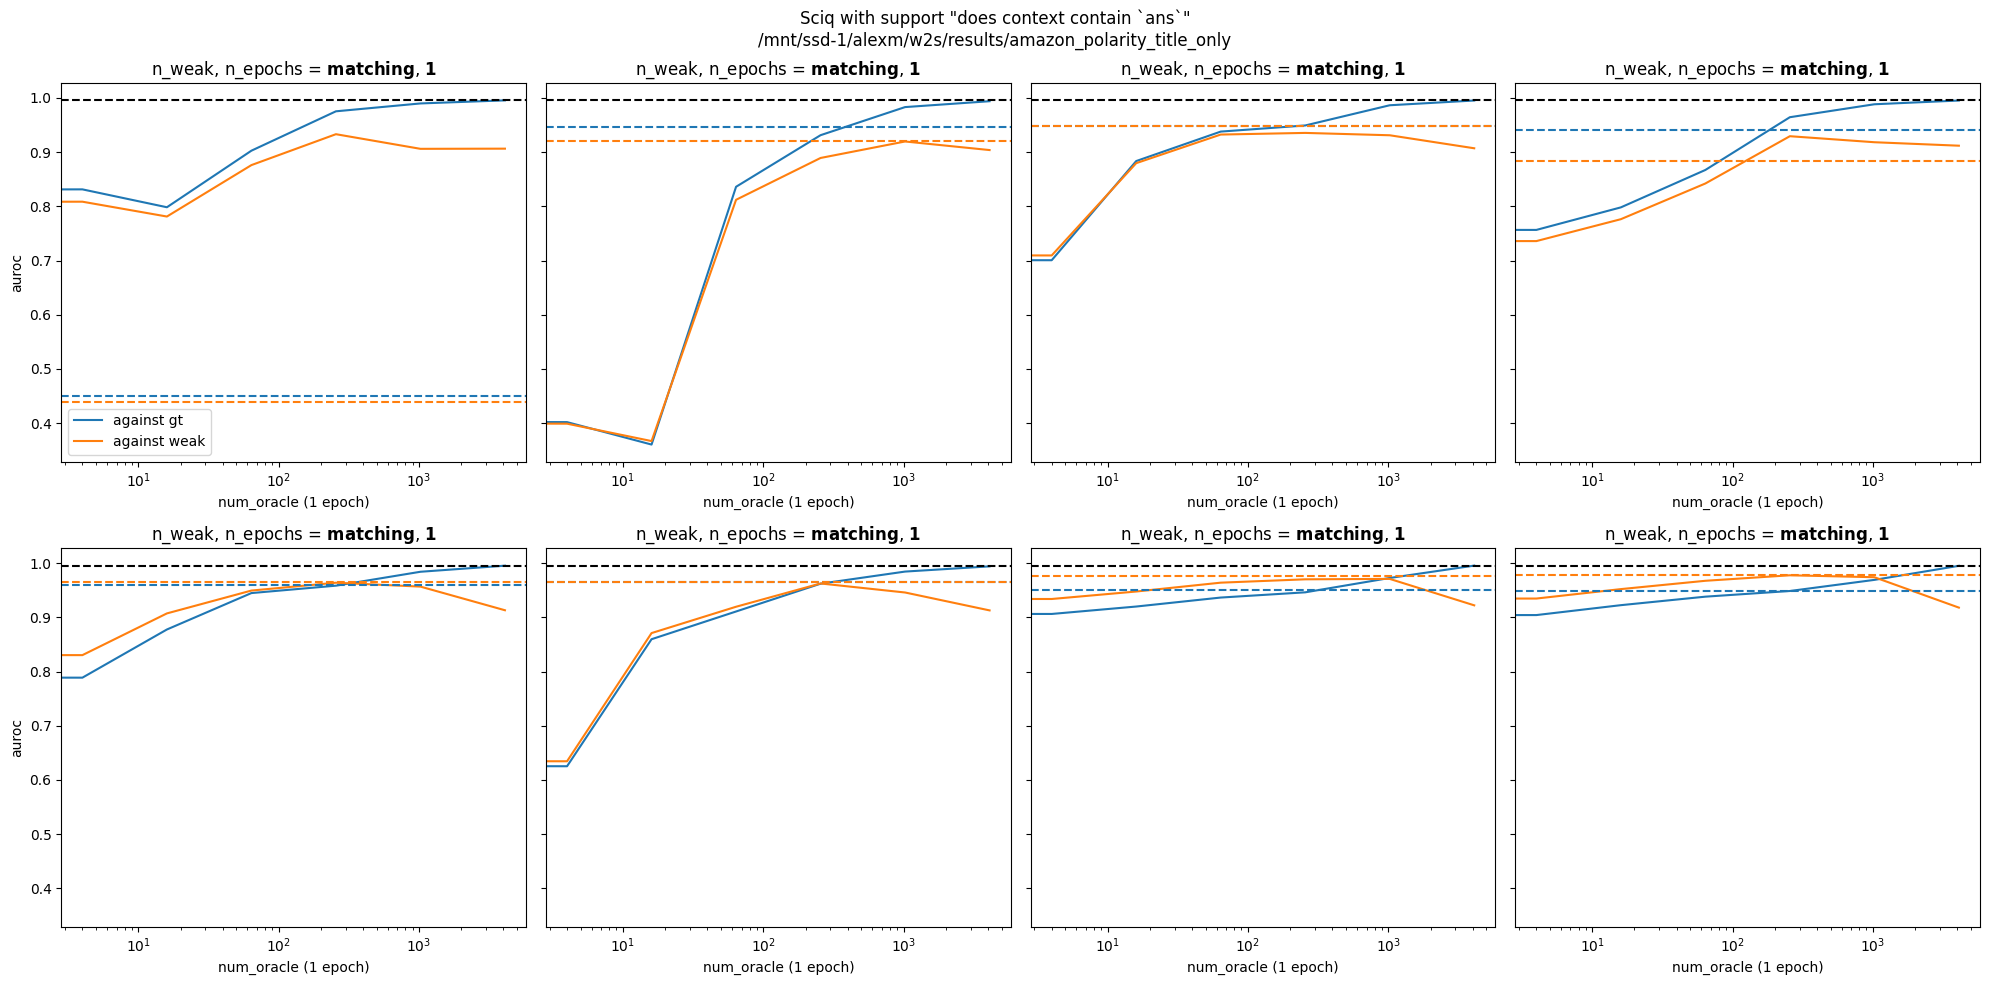

In [13]:
# I want a horizontal grid of aligned subplots, one for each n_weak, with x-axis=n_oracle, and y_axis=auroc

fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
for i, (df, config, name) in enumerate(zip(data, configs, names)):
    if i == 0:
        gt_ceil = df["auroc"].max()
    ax = axs[i // 4, i % 4]
    plt.sca(ax)
    sns.lineplot(x="num_oracle", y="auroc", data=df, label="against gt" if i == 0 else None)
    sns.lineplot(x="num_oracle", y="auroc_against_weak", data=df, label="against weak" if i == 0 else None)
    # horizontal lines for num_oracle = 0
    zero_row = df[df["num_oracle"] == 0]
    ax.axhline(zero_row["auroc"].values[0], color="tab:blue", linestyle="--", label="no oracle labels (gt)" if i == 0 else None)
    ax.axhline(zero_row["auroc_against_weak"].values[0], color="tab:orange", linestyle="--", label="no oracle labels (weak)" if i == 0 else None)
    ax.axhline(gt_ceil, color="black", linestyle="--", label="gt ceil" if i == 0 else None)

    last = name.split("_")[-1]
    if "x" in last:
        n_weak, n_epochs =last.split("x")
    else:
        n_weak = last
        n_epochs = "1"

    plt.title("n_weak, n_epochs = $\mathbf{" + n_weak + "}$, $\mathbf{" + n_epochs + "}$")
    plt.semilogx()
    plt.xlabel("num_oracle (1 epoch)")
    plt.ylabel("auroc")

plt.suptitle(f"{title}\n{root}")
plt.tight_layout()
plt.show()

In [47]:
with open("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/debug/results_0.json", "r") as f:
    d = json.load(f)
d["auroc"]


0.885147213935852